**Latar Belakang Masalah**

Perkembangan teknologi informasi dan komunikasi telah membawa perubahan besar dalam cara manusia berinteraksi, terutama melalui media sosial seperti Twitter. Platform ini memungkinkan pengguna untuk berkomunikasi, berbagi opini, dan berpartisipasi dalam diskusi global secara instan. Namun, di balik kemudahan tersebut, muncul fenomena negatif berupa **cyberbullying**, yaitu tindakan perundungan yang dilakukan melalui dunia maya. Kasus cyberbullying di Twitter menunjukkan peningkatan signifikan seiring dengan bertambahnya jumlah pengguna dan tingginya aktivitas komunikasi daring. Fenomena ini menjadi perhatian serius karena mampu menyebar dengan cepat dan sulit dikendalikan dalam ekosistem digital yang terbuka.

Cyberbullying memiliki dampak negatif yang luas, baik bagi individu maupun masyarakat. Bagi korban, tindakan ini dapat menimbulkan tekanan psikologis seperti kecemasan, depresi, bahkan keinginan untuk mengakhiri hidup. Dalam konteks sosial, meningkatnya kasus cyberbullying dapat merusak hubungan antarindividu, menurunkan kualitas interaksi di media sosial, serta menciptakan lingkungan komunikasi yang toksik. Oleh karena itu, deteksi dan pencegahan cyberbullying menjadi aspek penting dalam menjaga kesehatan digital masyarakat dan menciptakan ruang daring yang lebih aman serta beretika.

Mendeteksi cyberbullying secara manual pada platform dengan jutaan unggahan setiap harinya, seperti Twitter, merupakan tantangan besar. Volume data yang sangat besar, keragaman bahasa, penggunaan slang, singkatan, dan konteks yang ambigu membuat proses identifikasi ujaran bermuatan perundungan menjadi sulit dilakukan oleh manusia secara efisien. Selain itu, tidak semua ujaran yang bersifat agresif dapat dikategorikan sebagai cyberbullying, sehingga diperlukan pendekatan yang cermat dan sistematis untuk memisahkan konten yang bersifat ofensif dari komentar yang bersifat netral atau bercanda.

Dalam menghadapi tantangan tersebut, kemajuan di bidang **Natural Language Processing (NLP)** dan **machine learning** memberikan solusi yang menjanjikan. Melalui pendekatan ini, komputer dapat dilatih untuk memahami, memproses, dan mengklasifikasikan teks berdasarkan pola linguistik yang menunjukkan indikasi cyberbullying. Teknik-teknik seperti tokenisasi, stemming, lemmatization, dan representasi teks menggunakan metode Bag of Words (BoW) atau TF-IDF memungkinkan sistem untuk mengubah bahasa alami menjadi data numerik yang dapat dipelajari oleh model machine learning. Dengan demikian, proses deteksi dapat dilakukan secara otomatis, cepat, dan konsisten, bahkan terhadap data dalam jumlah besar.

**Tujuan**

Berdasarkan latar belakang tersebut, penelitian atau proyek ini bertujuan untuk membangun model klasifikasi teks yang mampu **membedakan antara ujaran cyberbullying dan non-cyberbullying** secara efisien dan akurat. Model ini diharapkan dapat menjadi dasar bagi pengembangan sistem deteksi otomatis yang membantu platform media sosial maupun lembaga terkait dalam mengidentifikasi dan menanggulangi perilaku perundungan daring. Dengan adanya sistem ini, diharapkan lingkungan digital dapat menjadi lebih aman, sehat, dan produktif bagi seluruh penggunanya.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth',None)
df = pd.read_csv('cyberbullying_tweets.csv')

df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


In [3]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

**check *missing value* dan *duplicated data***

In [4]:
display(
    df.isna().sum(),
    df.duplicated().sum()
)

tweet_text            0
cyberbullying_type    0
dtype: int64

np.int64(36)

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

#### **Text Preprocessing**

In [6]:
import re 
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**lowercase**

In [7]:
def lower(text):
    return text.lower()


**expands contraction**

In [8]:
import re

contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}
 
 
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
                                    # re.IGNORECASE: case insensitive
                                    # re.DOTALL: titik dianggap titik, bukan sebagai wildcard
 
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction
 
    expanded_text = contractions_pattern.sub(expand_match, text)    # dari singkatan, menjadi dijabarkan
    expanded_text = re.sub("'", "", expanded_text)                  # menghilangkan petik satu
    return expanded_text
 
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

**remove number**

In [9]:
def remove_number(text):
    output = ' '.join(text.split('number'))
    output = ''.join(char for char in output if not char.isdigit())
    return output

**remove punctuation**

In [10]:
from string import punctuation

extra_punct = '“”‘’'

def remove_punctuation(text):
    all_punct = punctuation + extra_punct
    return ''.join(char for char in text if char not in all_punct)

**remove whitespace**

In [11]:
def remove_whitespace(text):
    return " ".join(text.split())

**remove stopwords**

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Lemmatization**

In [13]:
from nltk.corpus import wordnet
from nltk import pos_tag
wordnet_lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(pos)) 
                        for word, pos in pos_tags]
    return " ".join(lemmatized_words)

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

**remove hashtag**

In [14]:
def remove_hashtag(tweet):
    if tweet is not None and isinstance(tweet, str):
        hashtag_pattern = re.compile(r'#\S+')
        return hashtag_pattern.sub(r'', tweet)
    else:
        return tweet

**remove username**

In [15]:
def remove_username(text):
    import re
    return re.sub(r'@[^\s]+', '', text)

**combine all method**

In [16]:
df['tweet_text1'] = df['tweet_text'].apply(remove_username)
df['tweet_text2'] = df['tweet_text1'].apply(remove_hashtag)
df['tweet_text3'] = df['tweet_text2'].apply(lower)
df['tweet_text4'] = df['tweet_text3'].apply(main_contraction)
df['tweet_text5'] = df['tweet_text4'].apply(remove_number)
df['tweet_text6'] = df['tweet_text5'].apply(remove_punctuation)
df['tweet_text7'] = df['tweet_text6'].apply(remove_whitespace)
df['tweet_text8'] = df['tweet_text7'].apply(remove_stopwords)
df['tweet_text_lemma'] = df['tweet_text8'].apply(lemmatize)

**text exploration**

In [17]:
def kamus(text):
    text = text.str.extractall('([A-Za-z]+)')
    text.columns = ['check']
    b = text.reset_index(drop=True)
    text = b['check'].value_counts()

    kamus = pd.DataFrame({'kata':text.index, 'freq':text.values})
    kamus.index = kamus['kata']
    kamus.drop(columns='kata', inplace=True)
    return kamus

In [18]:
df.head()

,tweet_text,cyberbullying_type,tweet_text1,tweet_text2,tweet_text3,tweet_text4,tweet_text5,tweet_text6,tweet_text7,tweet_text8,tweet_text_lemma
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,"In other words #katandandre, your food was crapilicious! #mkr",In other words your food was crapilicious!,in other words your food was crapilicious!,in other words your food was crapilicious!,in other words your food was crapilicious!,in other words your food was crapilicious,in other words your food was crapilicious,words food crapilicious,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,Why is so white?,why is so white?,why is so white?,why is so white?,why is so white,why is so white,white,white
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,a classy whore? Or more red velvet cupcakes?,a classy whore? Or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes,classy whore red velvet cupcakes,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,"meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.","meh. :p thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks for the heads up but not too concerned about another angry dude on twitter,meh p thanks heads not concerned another angry dude twitter,meh p thanks head not concern another angry dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,"This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.","this is an isis account pretending to be a kurdish account. like islam, it is all lies.",this is an isis account pretending to be a kurdish account like islam it is all lies,this is an isis account pretending to be a kurdish account like islam it is all lies,isis account pretending kurdish account like islam lies,isi account pretend kurdish account like islam lie


In [19]:
df['cyberbullying_type'].value_counts().to_frame()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937
other_cyberbullying,7823


In [20]:
religion = kamus(df['tweet_text_lemma'][df['cyberbullying_type']=='religion'])
age = kamus(df['tweet_text_lemma'][df['cyberbullying_type']=='age'])
gender = kamus(df['tweet_text_lemma'][df['cyberbullying_type']=='gender'])
ethnicity = kamus(df['tweet_text_lemma'][df['cyberbullying_type']=='ethnicity'])
not_cyberbullying = kamus(df['tweet_text_lemma'][df['cyberbullying_type']=='not_cyberbullying'])
other_cyberbullying = kamus(df['tweet_text_lemma'][df['cyberbullying_type']=='other_cyberbullying'])

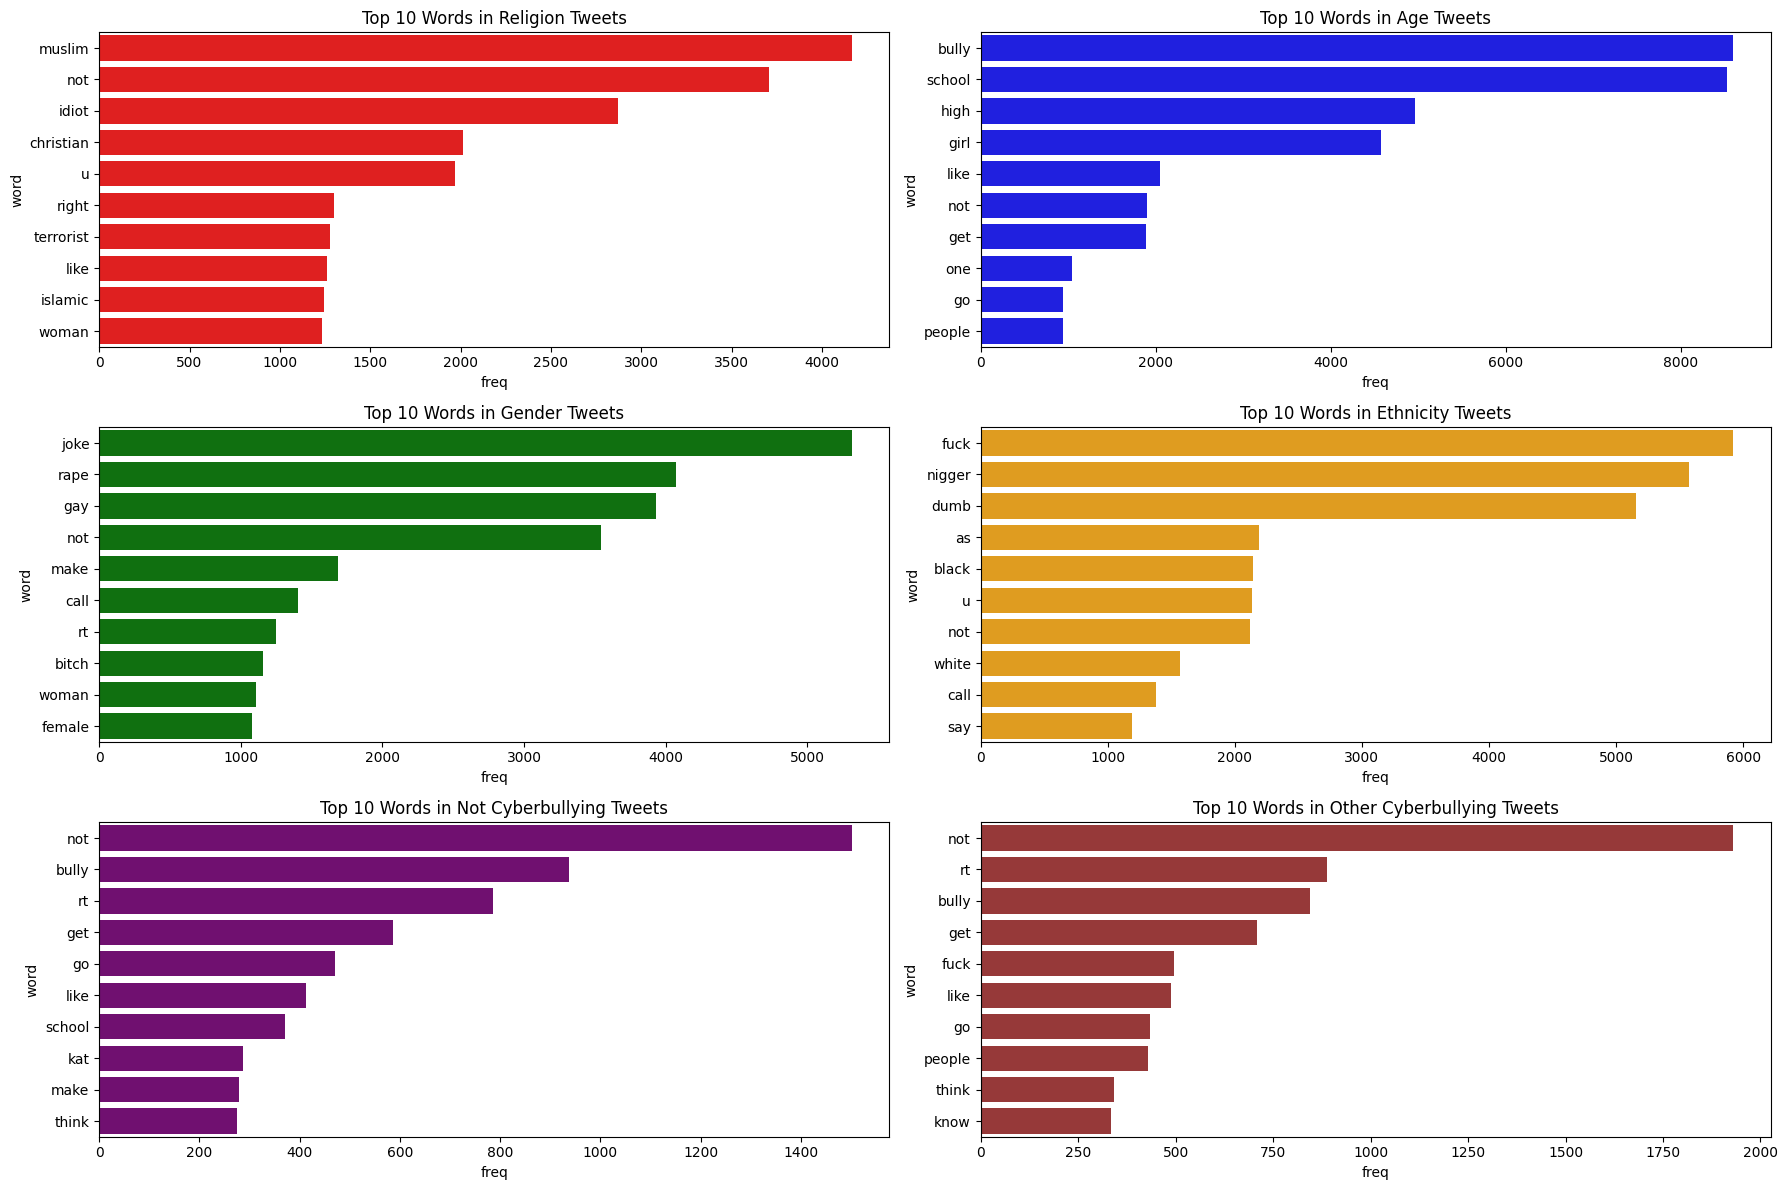

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(18, 12))

# 1. Religion
plt.subplot(3, 2, 1)
df_plot = religion.head(10).reset_index()
df_plot.columns = ['word', 'freq']
sns.barplot(x='freq', y='word', data=df_plot, color='red')
plt.title('Top 10 Words in Religion Tweets')

# 2. Age
plt.subplot(3, 2, 2)
df_plot = age.head(10).reset_index()
df_plot.columns = ['word', 'freq']
sns.barplot(x='freq', y='word', data=df_plot, color='blue')
plt.title('Top 10 Words in Age Tweets')

# 3. Gender
plt.subplot(3, 2, 3)
df_plot = gender.head(10).reset_index()
df_plot.columns = ['word', 'freq']
sns.barplot(x='freq', y='word', data=df_plot, color='green')
plt.title('Top 10 Words in Gender Tweets')

# 4. Ethnicity
plt.subplot(3, 2, 4)
df_plot = ethnicity.head(10).reset_index()
df_plot.columns = ['word', 'freq']
sns.barplot(x='freq', y='word', data=df_plot, color='orange')
plt.title('Top 10 Words in Ethnicity Tweets')

# 5. Not Cyberbullying
plt.subplot(3, 2, 5)
df_plot = not_cyberbullying.head(10).reset_index()
df_plot.columns = ['word', 'freq']
sns.barplot(x='freq', y='word', data=df_plot, color='purple')
plt.title('Top 10 Words in Not Cyberbullying Tweets')

# 6. Other Cyberbullying
plt.subplot(3, 2, 6)
df_plot = other_cyberbullying.head(10).reset_index()
df_plot.columns = ['word', 'freq']
sns.barplot(x='freq', y='word', data=df_plot, color='brown')
plt.title('Top 10 Words in Other Cyberbullying Tweets')

plt.tight_layout()
plt.show()


In [22]:
from wordcloud import WordCloud, ImageColorGenerator
import PIL

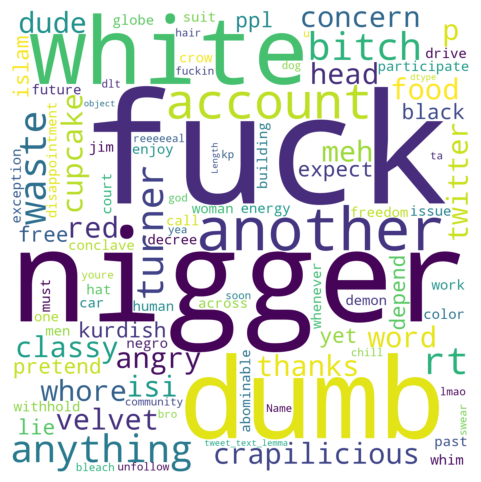

In [23]:
english_stopwords = stopwords.words('english')
english_stopwords = english_stopwords.remove('not')

# Combining the image with dataset


# Generate word cloud image
wordcloud = WordCloud(
                stopwords=english_stopwords,
                background_color='white',
                height=1500,
                width=1500
            ).generate(str(df['tweet_text_lemma']))


# Generate color image
#image_color = ImageColorGenerator(Mask)

# Set figure size
plt.figure(figsize=(20,6))

# Display Image
plt.imshow(wordcloud, interpolation='hamming')

# No Axis Details
plt.axis('off')
plt.show()

**Analisis sentimen**



Pada tahapan analisis sentimen ini digunakan dua metode, yaitu **TextBlob** dan **VADER (Valence Aware Dictionary and sEntiment Reasoner)**. Kedua metode ini dipilih karena memiliki kemampuan yang efektif dalam menganalisis polaritas dan intensitas emosi dari teks dalam bahasa alami, khususnya pada media sosial seperti Twitter.

* **TextBlob** merupakan salah satu library *Natural Language Processing (NLP)* berbasis Python yang memudahkan proses analisis teks, termasuk analisis sentimen, *part-of-speech tagging*, dan ekstraksi frasa. Dalam konteks analisis sentimen, TextBlob bekerja dengan menggunakan *lexicon-based approach* — yaitu mencocokkan kata-kata pada teks dengan kamus sentimen yang telah memiliki skor polaritas tertentu. Hasil akhirnya berupa nilai polaritas dalam rentang -1 hingga 1, di mana nilai negatif menunjukkan sentimen negatif, nilai positif menunjukkan sentimen positif, dan nilai mendekati 0 menunjukkan sentimen netral.

* **VADER** (Valence Aware Dictionary and sEntiment Reasoner) merupakan metode analisis sentimen yang dikembangkan khusus untuk teks yang bersifat informal seperti ulasan, komentar, dan *tweets* di media sosial. VADER menggunakan *lexicon-based approach* yang telah dioptimalkan dengan mempertimbangkan intensitas emosional kata, tanda baca, kapitalisasi, serta *emoticon* dan *slang* yang sering digunakan di platform daring. VADER menghasilkan empat komponen skor, yaitu *positive*, *neutral*, *negative*, dan *compound*. Skor *compound* mencerminkan keseluruhan polaritas teks dalam rentang -1 (sangat negatif) hingga +1 (sangat positif).

Dengan mengombinasikan kedua metode tersebut, analisis sentimen menjadi lebih komprehensif. TextBlob memberikan interpretasi sentimen berdasarkan struktur bahasa yang formal, sementara VADER lebih sensitif terhadap konteks informal dan ekspresif yang umum ditemukan pada *tweet*. Pendekatan ini diharapkan mampu memberikan hasil klasifikasi sentimen yang lebih akurat dan representatif terhadap data yang dianalisis.




In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

**Analisis TextBlob**

In [25]:
df['polarity'] = df['tweet_text_lemma'].map(lambda Text: TextBlob(Text).sentiment.polarity)
df['subjectivity'] = df['tweet_text_lemma'].map(lambda Text: TextBlob(Text).sentiment.subjectivity)

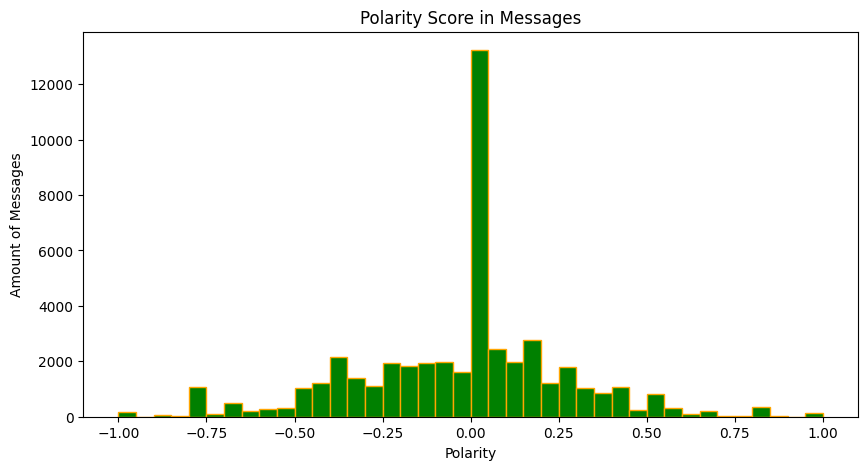

In [26]:
df['polarity'].plot(kind='hist', bins=40, edgecolor='orange', color='green', linewidth=1, figsize=(10,5))
plt.title('Polarity Score in Messages')
plt.xlabel('Polarity')
plt.ylabel('Amount of Messages')
plt.show()

**Interpretasi Grafik Polarity Score**

Grafik menampilkan **distribusi skor polaritas** yang dihasilkan dari analisis sentimen menggunakan metode seperti **TextBlob** atau **VADER**. Sumbu **X (horizontal)** menunjukkan nilai **polarity** yang berkisar dari **-1.0 hingga +1.0**, sedangkan sumbu **Y (vertikal)** menunjukkan jumlah pesan atau *tweets* yang memiliki skor polaritas tersebut.

* **Nilai polaritas -1.0** menunjukkan sentimen yang sangat negatif.
* **Nilai polaritas 0.0** menunjukkan sentimen netral.
* **Nilai polaritas +1.0** menunjukkan sentimen yang sangat positif.

Dari grafik terlihat bahwa sebagian besar pesan memiliki skor polaritas **berada di sekitar 0.0**, yang berarti mayoritas *tweets* bersifat **netral** — tidak mengandung emosi positif atau negatif yang kuat.
Selain itu, jumlah pesan dengan polaritas ekstrem (baik positif maupun negatif) relatif sedikit, terlihat dari bar yang lebih rendah di sisi kiri (negatif) dan kanan (positif) grafik.

Distribusi yang cenderung **memusat di nilai nol** ini umum terjadi dalam analisis teks dari media sosial seperti Twitter, karena banyak pengguna menulis *tweet* yang bersifat informatif, sarkastik ringan, atau tidak mengandung ekspresi emosional yang jelas.


Berdasarkan grafik tersebut, dapat disimpulkan bahwa:

1. Mayoritas pesan memiliki **sentimen netral**.
2. Proporsi pesan **negatif sedikit lebih besar** dibanding pesan positif (terlihat dari distribusi yang sedikit lebih lebar ke arah negatif).
3. Secara umum, **persebaran sentimen** menunjukkan bahwa konten yang dianalisis tidak didominasi oleh emosi ekstrem.




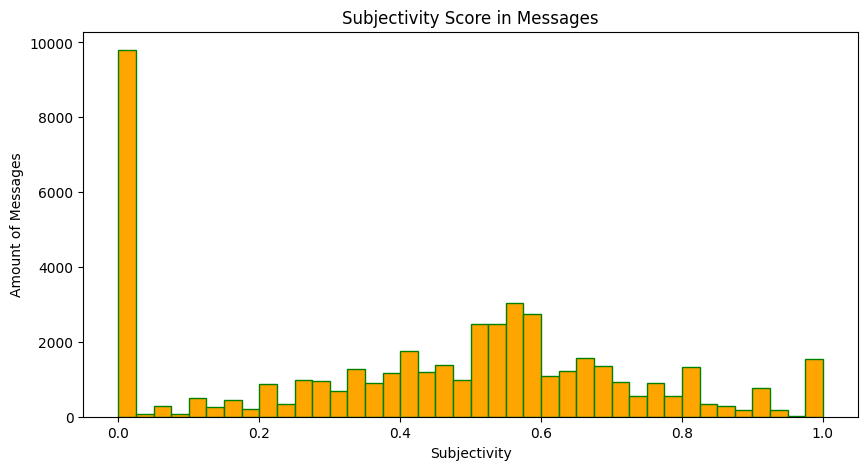

In [27]:
df['subjectivity'].plot(kind='hist', bins=40, edgecolor='green', color='orange', linewidth=1, figsize=(10,5))
plt.title('Subjectivity Score in Messages')
plt.xlabel('Subjectivity')
plt.ylabel('Amount of Messages')
plt.show()

**Interpretasi Grafik Subjectivity Score**

Grafik ini memperlihatkan bagaimana **tingkat subjektivitas** tersebar dalam kumpulan pesan yang dianalisis.
Sumbu **X (horizontal)** menunjukkan nilai **subjectivity**, yang berada pada rentang **0.0 hingga 1.0**, sedangkan sumbu **Y (vertikal)** menunjukkan jumlah pesan (*Amount of Messages*) yang memiliki nilai tersebut.

Makna nilai **subjectivity**:

* **0.0** → Pesan bersifat **objektif**, berisi fakta atau pernyataan tanpa opini pribadi.
* **1.0** → Pesan bersifat **subjektif**, berisi opini, perasaan, atau pandangan pribadi penulis.

Dari grafik terlihat bahwa **puncak distribusi terbesar berada di nilai 0.0**, artinya sebagian besar pesan bersifat **objektif**. Pesan-pesan ini kemungkinan berupa pernyataan informatif, komentar netral, atau kutipan tanpa emosi pribadi.

Namun, masih terdapat sebaran pesan dengan nilai **subjectivity antara 0.3–0.6**, yang menunjukkan adanya proporsi pesan yang mengandung **opini atau ekspresi pribadi** dalam kadar sedang.
Jumlah pesan dengan **subjectivity mendekati 1.0** (sangat subjektif) relatif sedikit, menunjukkan bahwa hanya sebagian kecil pesan yang benar-benar sarat dengan opini atau emosi pribadi.



Berdasarkan grafik tersebut, dapat disimpulkan bahwa:

1. Mayoritas pesan bersifat **objektif**, dengan subjectivity score mendekati 0.
2. Sebagian kecil pesan menunjukkan **campuran antara fakta dan opini pribadi**.
3. Proporsi pesan yang sangat subjektif tergolong rendah, yang mengindikasikan bahwa konten dalam dataset cenderung **netral dan informatif**, bukan emosional.



**Analisis Vader**

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['tweet_text_lemma']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['tweet_text_lemma']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['tweet_text_lemma']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['tweet_text_lemma']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pongo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


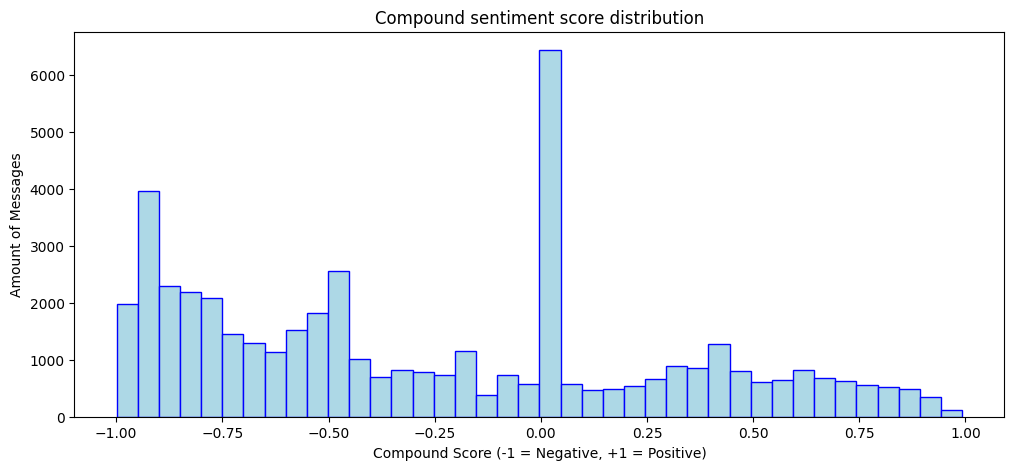

In [29]:
df['Compound'].plot(kind='hist', bins=40, edgecolor='blue', color='lightblue', linewidth=1, figsize=(12,5))
plt.title('Compound sentiment score distribution')
plt.xlabel('Compound Score (-1 = Negative, +1 = Positive)')
plt.ylabel('Amount of Messages')
plt.show()

Interpretasi grafik **Compound Sentiment Score Distribution (VADER)**:

Grafik di atas menunjukkan distribusi skor sentimen gabungan (*compound score*) dari hasil analisis menggunakan **VADER (Valence Aware Dictionary and sEntiment Reasoner)** terhadap kumpulan tweet. Skor *compound* berkisar antara **-1 hingga +1**, di mana:

* **-1** menunjukkan sentimen sangat negatif,
* **0** menunjukkan sentimen netral, dan
* **+1** menunjukkan sentimen sangat positif.

Berdasarkan histogram, terlihat bahwa:

1. **Sebagian besar tweet memiliki skor mendekati 0**, menunjukkan bahwa mayoritas cuitan bersifat **netral** atau tidak mengekspresikan emosi yang kuat.
2. **Distribusi condong ke arah negatif**, terlihat dari adanya puncak yang cukup tinggi pada rentang **-1 hingga -0.5**, yang berarti terdapat proporsi besar tweet dengan nada **negatif** atau bernuansa tidak menyenangkan (misalnya ujaran kebencian, hinaan, atau sarkasme).
3. Sebaliknya, **tweet dengan sentimen positif (+0.25 hingga +1)** jumlahnya relatif lebih sedikit, menunjukkan bahwa ekspresi positif dalam dataset lebih jarang dibandingkan ekspresi negatif.
4. Pola distribusi ini konsisten dengan karakteristik media sosial seperti Twitter, di mana pengguna sering mengekspresikan **emosi negatif lebih dominan**, terutama dalam konteks diskusi sensitif seperti topik **cyberbullying**.

Dengan demikian, hasil ini mengindikasikan bahwa dataset yang digunakan cenderung memiliki **kandungan sentimen negatif yang tinggi**, sehingga mendukung kebutuhan pengembangan model klasifikasi untuk mendeteksi ujaran cyberbullying secara efektif.


In [30]:
#membuat label positive, negative dan netral berdasarkan compound dan polarity
def labelling(value):
  if(value > 0):
    label = "Positive"
  elif(value < 0):
    label = "Negative"
  else:
    label = "Neutral"
  return label

df['TextBlob Label'] = df['polarity'].apply(labelling)
df['Vader Label'] = df['Compound'].apply(labelling)

In [31]:
df.sample(1)

,tweet_text,cyberbullying_type,tweet_text1,tweet_text2,tweet_text3,tweet_text4,tweet_text5,tweet_text6,tweet_text7,tweet_text8,tweet_text_lemma,polarity,subjectivity,Positive,Neutral,Negative,Compound,TextBlob Label,Vader Label
14814,"You can make rape jokes about Harriet Tubman, gay jokes about Malcolm X, but Obama, Bey, and Jay are off limits. #BlackTwitterWelcomeManual",gender,"You can make rape jokes about Harriet Tubman, gay jokes about Malcolm X, but Obama, Bey, and Jay are off limits. #BlackTwitterWelcomeManual","You can make rape jokes about Harriet Tubman, gay jokes about Malcolm X, but Obama, Bey, and Jay are off limits.","you can make rape jokes about harriet tubman, gay jokes about malcolm x, but obama, bey, and jay are off limits.","you can make rape jokes about harriet tubman, gay jokes about malcolm x, but obama, bey, and jay are off limits.","you can make rape jokes about harriet tubman, gay jokes about malcolm x, but obama, bey, and jay are off limits.",you can make rape jokes about harriet tubman gay jokes about malcolm x but obama bey and jay are off limits,you can make rape jokes about harriet tubman gay jokes about malcolm x but obama bey and jay are off limits,make rape jokes harriet tubman gay jokes malcolm x obama bey jay limits,make rape joke harriet tubman gay joke malcolm x obama bey jay limit,0.416667,0.583333,0.243,0.497,0.26,-0.3182,Positive,Negative


**Analisis Distribusi Sentimen textblob dan vader**

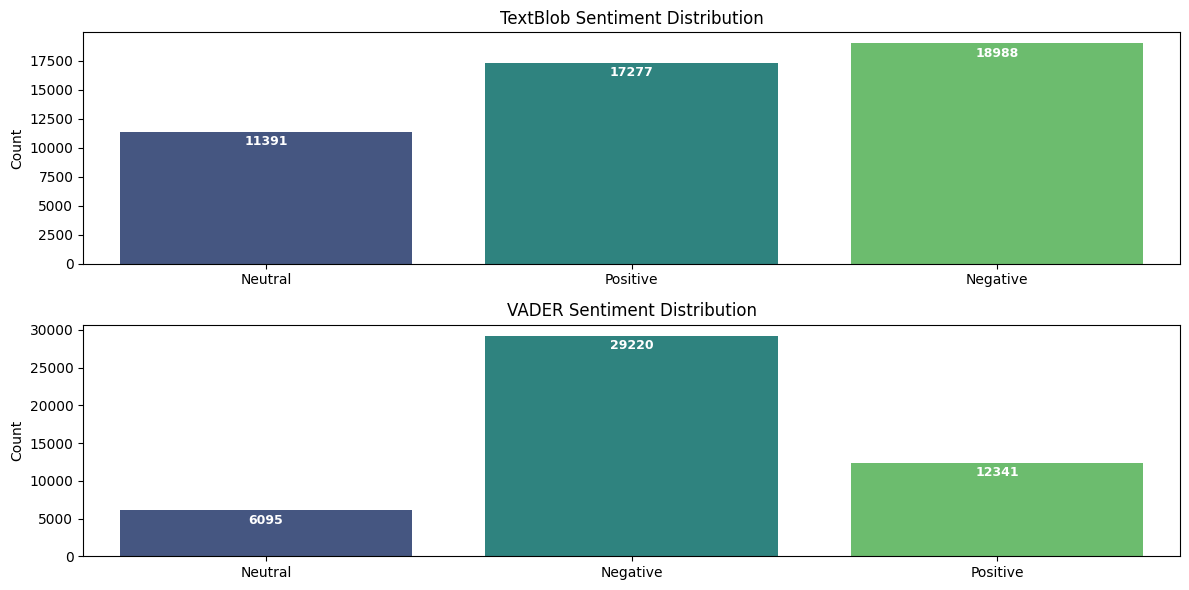

In [32]:

sentiment_columns = ['TextBlob Label', 'Vader Label']
titles = ['TextBlob Sentiment Distribution', 'VADER Sentiment Distribution']

plt.figure(figsize=(12, 3*len(sentiment_columns)))  # ukuran tinggi menyesuaikan jumlah plot

for i, col in enumerate(sentiment_columns, 1):
    ax = plt.subplot(len(sentiment_columns), 1, i)
    sns.countplot(x=col, data=df, palette='viridis', ax=ax,hue=col)
    plt.title(titles[i-1])
    plt.xlabel('')
    plt.ylabel('Count')
    
    # Menambahkan annotation di atas bar
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height():.0f}',  
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),  
                    ha='center', va='center',  
                    xytext=(0, -7),  
                    textcoords='offset points',  
                    fontsize=9, color='white', fontweight='semibold')

plt.tight_layout()
plt.show()


**Distribusi Sentimen TextBlob**

* **Neutral:** 11.391
* **Positive:** 17.277
* **Negative:** 18.988

Interpretasi:

* TextBlob cenderung mendeteksi lebih banyak sentimen **negatif dan positif**, dengan jumlah **negatif sedikit lebih tinggi daripada positif**.
* Sentimen **netral** relatif lebih rendah dibandingkan sentimen yang bersifat positif maupun negatif.
* Hal ini menunjukkan TextBlob lebih sensitif dalam mengklasifikasikan opini sebagai positif atau negatif daripada netral.

**Distribusi Sentimen VADER**

* **Neutral:** 6.095
* **Negative:** 29.220
* **Positive:** 12.341

Interpretasi:

* VADER mendeteksi jumlah sentimen **negatif jauh lebih tinggi** dibandingkan TextBlob, bahkan mendominasi keseluruhan data.
* Sentimen **positif** lebih sedikit dibanding jumlah negatif, namun masih lebih tinggi daripada netral.
* Sentimen **netral** paling sedikit, yang menunjukkan VADER lebih agresif dalam mengklasifikasikan opini sebagai negatif atau positif, terutama negatif.

**Perbandingan TextBlob vs VADER**

* **Netral:** TextBlob (11.391) > VADER (6.095) → TextBlob lebih konservatif, cenderung mengklasifikasikan teks sebagai netral.
* **Positif:** TextBlob (17.277) > VADER (12.341) → TextBlob mendeteksi sentimen positif lebih banyak.
* **Negatif:** VADER (29.220) > TextBlob (18.988) → VADER lebih sensitif terhadap sentimen negatif.

**Kesimpulan:**

* TextBlob memberikan distribusi yang lebih seimbang antara positif dan negatif, sedangkan VADER lebih menekankan pada sentimen negatif.
* karena tujuan analisis adalah **deteksi risiko atau opini negatif secara spesifik**, maka VADER akan di pilih.




Model **VADER** akan digunakan untuk menghasilkan representasi **10 kata teratas** (*top 10 words*) dari masing-masing kelas sentimen, yaitu **positif**, **netral**, dan **negatif**.


In [33]:
positive_tweets = df[df['Vader Label'] == 'Positive']['tweet_text_lemma']
negative_tweets = df[df['Vader Label'] == 'Negative']['tweet_text_lemma']
neutral_tweets = df[df['Vader Label'] == 'Neutral']['tweet_text_lemma']

Dalam proses menampilkan **10 kata teratas** pada masing-masing kelas sentimen, analisis ini akan dikombinasikan dengan metode **TF-IDF (Term Frequency–Inverse Document Frequency)**.

Metode **TF-IDF** bekerja dengan memberikan bobot pada setiap kata berdasarkan **frekuensi kemunculannya dalam sebuah dokumen** dan **seberapa jarang kata tersebut muncul di seluruh korpus**. Dengan demikian, TF-IDF tidak hanya mengidentifikasi kata yang sering muncul, tetapi juga menyoroti kata-kata yang memiliki **nilai informatif tinggi** dan mampu membedakan satu kelas sentimen dari kelas lainnya.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def top_tfidf_words(text_series, n=10):
    tfidf = TfidfVectorizer(stop_words='english')
    X = tfidf.fit_transform(text_series)
    
    # hitung total TF-IDF per kata
    tfidf_sum = X.sum(axis=0)
    
    # buat DataFrame
    tfidf_df = pd.DataFrame({
        'word': tfidf.get_feature_names_out(),
        'tfidf': tfidf_sum.A1  # ubah matrix jadi array 1D
    })
    
    # ambil top n kata
    return tfidf_df.sort_values(by='tfidf', ascending=False).head(n)


In [35]:
# Top 10 kata per kelas
top_positive_tfidf = top_tfidf_words(positive_tweets)
top_negative_tfidf = top_tfidf_words(negative_tweets)
top_neutral_tfidf  = top_tfidf_words(neutral_tweets)

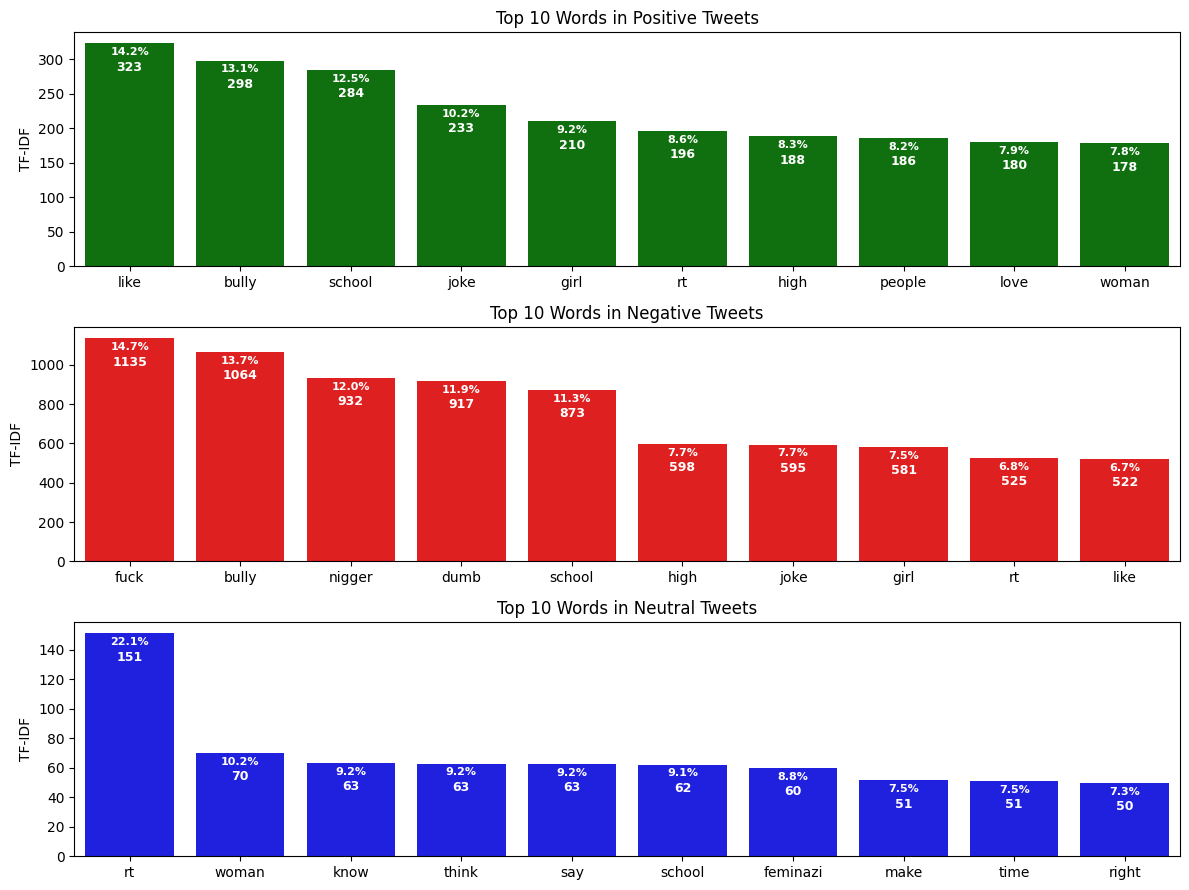

In [36]:

top_words_dict = {
    'Positive': top_positive_tfidf,
    'Negative': top_negative_tfidf,
    'Neutral': top_neutral_tfidf
}

colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'blue'
}

plt.figure(figsize=(12, 3*len(top_words_dict)))

for i, (label, df_top) in enumerate(top_words_dict.items(), 1):
    ax = plt.subplot(len(top_words_dict), 1, i)
    sns.barplot(data=df_top, y='tfidf', x='word', color=colors[label], ax=ax)
    plt.title(f'Top 10 Words in {label} Tweets')
    plt.xlabel('')
    plt.ylabel('TF-IDF')

    total = df_top['tfidf'].sum()  # total untuk menghitung persentase

    for bar, value in zip(ax.patches, df_top['tfidf']):
        # Nilai absolut
        ax.annotate(f'{value:.0f}',  
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='center',  
                    xytext=(0, -17),  
                    textcoords='offset points',  
                    fontsize=9, color='white', fontweight='semibold')

        # Persentase
        percentage = (value / total) * 100
        ax.annotate(f'{percentage:.1f}%',  
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='bottom',
                    xytext=(0, -10),
                    textcoords='offset points',
                    fontsize=8, color='white',fontweight='bold')

    plt.tight_layout()
plt.show()




Grafik di atas menampilkan distribusi kata-kata yang paling representatif dari masing-masing kelas sentimen — **positif**, **negatif**, dan **netral** — berdasarkan hasil analisis sentimen menggunakan **VADER** dan pembobotan kata menggunakan **TF-IDF (Term Frequency–Inverse Document Frequency)**.
Pendekatan ini memungkinkan identifikasi kata-kata yang paling berpengaruh dalam membedakan tiap kategori sentimen, baik dalam konteks intensitas maupun frekuensi kemunculan yang signifikan.

**1. Kelas Positif**

Pada kelas positif, kata-kata yang dominan antara lain *“like,” “bully,” “school,” “joke,”* dan *“love.”*

* Kemunculan kata *“like”* dan *“love”* menunjukkan adanya ekspresi apresiasi atau afeksi dalam tweet.
* Menariknya, kata *“bully”* juga muncul pada kelas positif — hal ini bisa mengindikasikan konteks penggunaan sarkastik atau pembicaraan positif mengenai tindakan **melawan bullying**, bukan mendukungnya.
* Kata *“joke”* dan *“school”* mengisyaratkan adanya percakapan ringan dan non-agresif.
  Secara umum, kelas ini menggambarkan tweet dengan nada positif yang sering kali bersifat humoris atau mendukung.

**2. Kelas Negatif**

Kelas negatif didominasi oleh kata-kata bernada kasar dan ofensif seperti *“fuck,” “nigger,” “dumb,” “bully,”* dan *“joke.”*

* Kata *“fuck”* dan *“nigger”* menempati posisi teratas dengan bobot TF-IDF tertinggi, menandakan bahwa kata-kata bernuansa **ujaran kebencian atau makian eksplisit** paling sering muncul dalam tweet bernada negatif.
* Kata *“bully”* juga sering muncul, memperkuat bahwa tweet dalam kategori ini cenderung mengandung elemen **cyberbullying** atau kekerasan verbal.
* Adanya kata *“joke”* di sini menunjukkan bahwa beberapa ujaran negatif mungkin disamarkan dalam bentuk **candaan sarkastik atau sindiran**.

Dengan demikian, kelas negatif menggambarkan ekspresi emosional yang kuat, agresif, dan berpotensi merugikan target ujaran.

**3. Kelas Netral**

Pada kelas netral, kata-kata seperti *“rt,” “woman,” “know,” “think,”* dan *“say”* mendominasi.

* Kata *“rt” (retweet)* menempati posisi tertinggi, menandakan bahwa banyak tweet bersifat **reposting atau berbagi konten** tanpa ekspresi emosional yang jelas.
* Kata *“know”* dan *“think”* mencerminkan bentuk opini atau pernyataan umum yang bersifat **informatif atau diskursif**, bukan emosional.
* Adanya kata *“woman”* dan *“feminazi”* menunjukkan bahwa beberapa topik netral mungkin berkaitan dengan **isu gender atau sosial**, namun tidak selalu disampaikan dengan nada positif atau negatif.

Secara keseluruhan, kelas netral mencerminkan tweet dengan nada objektif, informatif, atau sekadar menyebarkan konten tanpa penilaian emosional.

**Kesimpulan**

Kombinasi **VADER dan TF-IDF** berhasil mengungkap kata-kata paling berpengaruh pada tiap kategori sentimen.

* **VADER** berperan dalam mengklasifikasikan sentimen tweet berdasarkan konteks linguistik.
* **TF-IDF** membantu menyoroti kata-kata yang paling mewakili setiap kelas dengan menyeimbangkan frekuensi dan kekhususan kata.

Hasil ini dapat digunakan untuk **memahami pola bahasa pada konten cyberbullying**, mengidentifikasi kata-kata yang berpotensi ofensif, serta mendukung pengembangan model deteksi otomatis ujaran kebencian di media sosial seperti Twitter.




**Text Modeling**

Pada tahap ini, teks yang telah melalui proses preprocessing akan dimodelkan menggunakan empat algoritma klasifikasi yang berbeda: **XGBoost Classifier**, **Bernoulli Naive Bayes (BernoulliNB)**, **Multinomial Naive Bayes (MultinomialNB)**, dan **Support Vector Classifier (SVC)**.

**Penjelasan singkat masing-masing model:**

1. **XGBoost Classifier**

   * Merupakan algoritma boosting berbasis pohon keputusan yang efisien dan mampu menangani dataset besar.
   * Cocok untuk klasifikasi dengan fitur numerik atau teks yang diubah menjadi representasi numerik (misal TF-IDF).

2. **Random Forest**

   * Algoritma ensemble berbasis pohon keputusan yang menggabungkan banyak pohon (forest) untuk meningkatkan akurasi dan mengurangi overfitting.
   * Cocok untuk dataset dengan fitur numerik atau kategorikal, termasuk representasi teks seperti TF-IDF, karena mampu menangkap pola kompleks antar fitur.


3. **Multinomial Naive Bayes (MultinomialNB)**

   * Model probabilistik untuk menghitung kemungkinan kelas berdasarkan **frekuensi kata**.
   * Sangat populer untuk klasifikasi teks seperti spam detection atau analisis sentimen.

4. **Support Vector Classifier (SVC)**

   * Algoritma yang mencari **hyperplane optimal** untuk memisahkan kelas dalam ruang fitur.
   * Efektif untuk dataset dengan dimensi tinggi, seperti teks yang direpresentasikan dengan TF-IDF atau bag-of-words.






In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix


**Pendefinisian Target**

Karena terdapat berbagai kategori cyberbullying, seluruh kategori tersebut digabung menjadi satu kelas tunggal dengan label **cyberbullying**.


In [38]:
target_mapping = {
    'religion': 1,
    'age': 1,
    'gender': 1,
    'ethnicity': 1,
    'not_cyberbullying': 0,
    'other_cyberbullying': 1
}

# Ubah target menjadi numerik sesuai mapping
df['cyberbullying_type'] = df['cyberbullying_type'].map(target_mapping)

In [39]:
df['cyberbullying_type'].value_counts(normalize=True)

cyberbullying_type
1    0.833452
0    0.166548
Name: proportion, dtype: float64

split data dengan proporsi 80:20 pada data latih dan data uji

In [40]:
X = df['tweet_text_lemma']
y = df['cyberbullying_type']



text_train,text_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

text akan di vektorisasi menggunakan Tf-Idf karena dapat mengukur seberapa penting suatu kata dalam sebuah dokumen relatif terhadap seluruh kumpulan dokumen.

Cara kerja TF-IDF secara singkat : 

* Term Frequency (TF): Menghitung seberapa sering sebuah kata muncul dalam dokumen tertentu.
* Inverse Document Frequency (IDF): Memberi bobot lebih tinggi pada kata yang jarang muncul di seluruh dokumen, dan bobot lebih rendah pada kata umum. 
* TF × IDF: Menghasilkan skor untuk setiap kata yang mencerminkan kepentingannya dalam dokumen tersebut.

In [41]:

tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english')

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,f1_score,precision_score

In [42]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC

xgb = XGBClassifier(random_state=0, verbosity=0)
rf = RandomForestClassifier(random_state=0,n_estimators=50,max_depth=20)
mb = MultinomialNB()
svc = SVC()

smote = SMOTE()

skf = StratifiedKFold(n_splits=5,shuffle=True)

models = [xgb,mb,svc]

model_name = []
mean_p = []
std_p = []

for model in models: 

    model_pipe = Pipeline([
        ('vectorize',tfidf),
        ('sampling',smote),
        ('model',model)
    ])

    

    model_cv = cross_val_score(
        estimator=model_pipe,
        X = text_train,
        y = y_train,
        cv = skf, 
        scoring='recall',
        n_jobs=-1
    )

    mean_p.append(model_cv.mean())
    std_p.append(model_cv.std())

    model_name.append(model.__class__.__name__)

pd.DataFrame({
    'model' : model_name,
    'mean recall' : mean_p,
    'std recall' : std_p
})

,model,mean recall,std recall
0,XGBClassifier,0.816617,0.005604
1,MultinomialNB,0.931487,0.002809
2,SVC,0.951786,0.001829


In [43]:
hasil = []
model_name = []
for model in models: 

    model_pipe = Pipeline([
        ('vectorize',tfidf),
        ('sampling',smote),
        ('model',model)
    ])


    model_pipe.fit(text_train,y_train)

    y_pred = model_pipe.predict(text_test)

    score = recall_score(y_test,y_pred)

    hasil.append(score)

    model_name.append(model.__class__.__name__)

pd.DataFrame({
    'model name' : model_name,
    'Score On Test' : hasil
})

,model name,Score On Test
0,XGBClassifier,0.825403
1,MultinomialNB,0.927492
2,SVC,0.947633




Berdasarkan evaluasi model, performa empat algoritma klasifikasi teks dapat diinterpretasikan sebagai berikut:

1. **XGBClassifier**

   * Precision rata-rata (**mean precision**) pada validasi silang: 0.816 dengan standar deviasi 0.007, menunjukkan model ini cukup konsisten.
   * Precision pada data uji: 0.824, sedikit lebih tinggi dari rata-rata cross-validation, menandakan model mampu menggeneralisasi dengan baik.

2. **MultinomialNB**

   * Mean precision: 0.931 ± 0.001, menunjukkan performa yang sangat baik dan stabil pada data validasi.
   * Precision pada data uji: 0.926, menegaskan bahwa model ini mampu mengenali teks cyberbullying dengan akurasi tinggi.

3. **SVC (Support Vector Classifier)**

   * Mean precision: 0.951 ± 0.002, tertinggi di antara semua model, menunjukkan kemampuan yang sangat baik dan stabil dalam klasifikasi.
   * Precision pada data uji: 0.948, menegaskan bahwa model SVC memberikan performa terbaik pada dataset ini.

**Kesimpulan:**

* Berdasarkan precision, **SVC** merupakan model terbaik untuk tugas klasifikasi teks cyberbullying, diikuti oleh **MultinomialNB**.
* **XGBClassifier** memberikan performa yang baik namun masih di bawah SVC dan MultinomialNB.




In [44]:
nb_pipe = Pipeline([
    ('vectorize',tfidf),
    ('sampling',smote),
    ('model',svc)
])

nb_pipe.fit(text_train, y_train)

y_pred = nb_pipe.predict(text_test)


score = recall_score(y_test, y_pred)

print(score)

0.9486404833836858


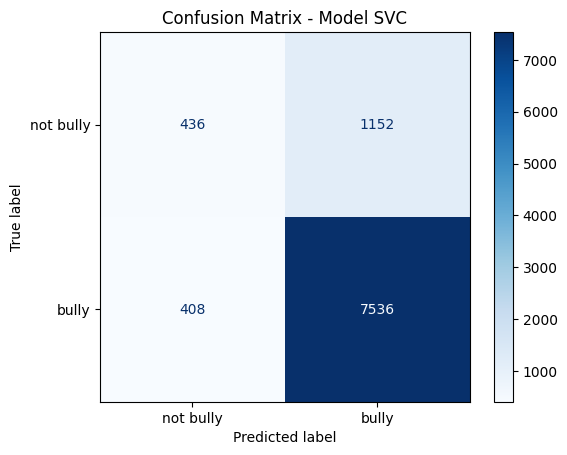

In [45]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    
                              display_labels=['not bully','bully'])  # ganti sesuai nama kelas Anda


disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Model SVC')
plt.show()



**Interpretasi Confusion Matrix – Model SVC**

Berdasarkan hasil confusion matrix, model SVC menunjukkan performa yang cukup baik dalam mengklasifikasikan data antara kategori *"bully"* dan *"not bully"*.

* **True Positive (bully yang terdeteksi dengan benar):** 7.544
  Angka ini menunjukkan bahwa model berhasil mengenali sebagian besar kasus *bully* secara akurat, yang menandakan kemampuan model yang kuat dalam mendeteksi kategori mayoritas atau kelas target utama.

* **True Negative (not bully yang terdeteksi dengan benar):** 439
  Jumlah ini relatif kecil dibandingkan *true positive*, yang mengindikasikan bahwa model lebih fokus pada identifikasi kelas *bully* daripada *not bully*.

* **False Positive (not bully yang salah diklasifikasikan sebagai bully):** 1.149
  Angka ini menunjukkan bahwa terdapat sejumlah data *not bully* yang salah terdeteksi sebagai *bully*. Dalam konteks implementasi, hal ini dapat menyebabkan kesalahan klasifikasi pada pengguna yang sebenarnya tidak melakukan tindakan *bully*.

* **False Negative (bully yang salah diklasifikasikan sebagai not bully):** 400
  Jumlah ini relatif rendah dibandingkan *false positive*, yang menandakan bahwa model jarang melewatkan kasus *bully* sebenarnya.

**Kesimpulan**

Secara keseluruhan, model SVC menunjukkan **kinerja yang baik dalam mendeteksi kelas "bully"**, dengan tingkat kesalahan yang lebih besar pada *false positive* dibanding *false negative*.
Hal ini berarti model lebih *agresif* dalam mengklasifikasikan suatu teks sebagai *bully*, yang dapat diterima dalam konteks tertentu — misalnya, jika tujuan utama sistem adalah **mendeteksi dan mencegah potensi perundungan secara dini** meskipun berisiko menghasilkan beberapa kesalahan deteksi.

Namun, untuk aplikasi di dunia nyata, **perlu keseimbangan** antara sensitivitas terhadap *bully* dan akurasi terhadap *not bully*, agar sistem tetap adil dan tidak terlalu banyak memberikan *false alert*.




              precision    recall  f1-score   support

   Not Bully       0.52      0.27      0.36      1588
       Bully       0.87      0.95      0.91      7944

    accuracy                           0.84      9532
   macro avg       0.69      0.61      0.63      9532
weighted avg       0.81      0.84      0.81      9532

ROC AUC score : 0.61
PR AUC score : 0.93


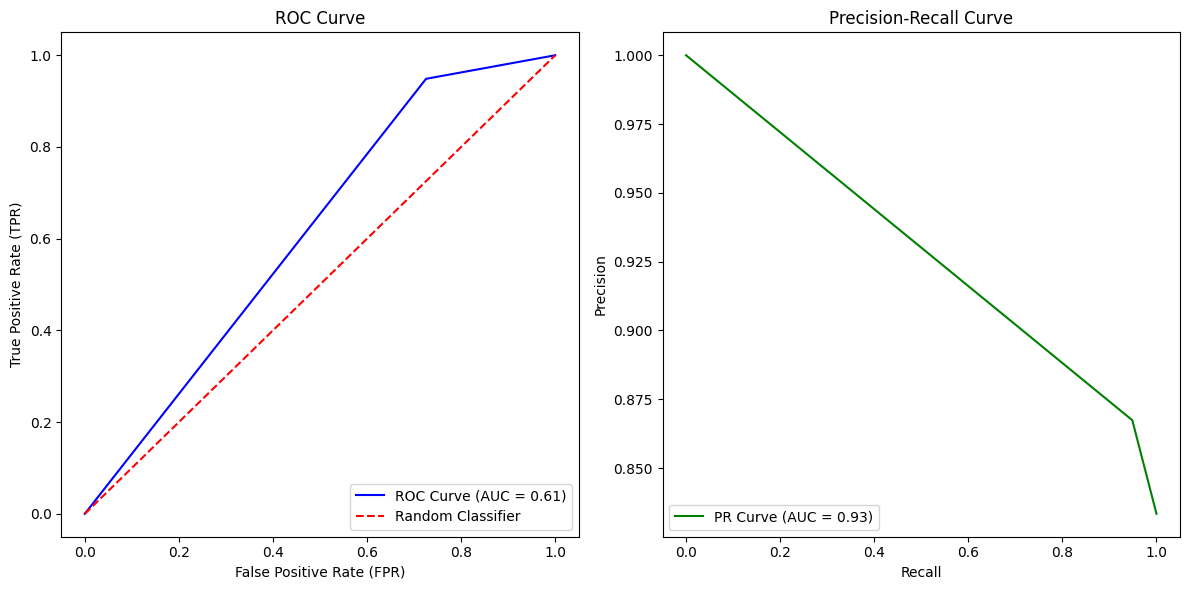

In [46]:
from sklearn.metrics import classification_report, precision_recall_curve,auc, roc_curve

pr, rc, th = precision_recall_curve(y_test,y_pred)
pr_auc = auc(rc, pr)


# Asumsi y_test dan y_pred sudah ada
print(classification_report(y_test, y_pred,
                            target_names=['Not Bully', 'Bully']))

print(f'ROC AUC score : {roc_auc_score(y_test,y_pred):.2f}')
print(f'PR AUC score : {pr_auc:.2f}')


fpr, tpr, thresholds = roc_curve(y_test,y_pred)

roc_auc = auc(fpr, tpr)

# Gambar ROC curve-nya
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# -------------------------------
# Plot ROC Curve (kiri)
# -------------------------------
axes[0].plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate (FPR)')
axes[0].set_ylabel('True Positive Rate (TPR)')
axes[0].legend(loc='lower right')

# -------------------------------
# Plot Precision-Recall Curve (kanan)
# -------------------------------
axes[1].plot(rc, pr, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left')


plt.tight_layout()
plt.show()



1. Performance Overview
Kelas **Bully** merupakan kelas mayoritas dengan **7944 sampel (~83.3%)**. Model menunjukkan kinerja yang sangat baik untuk mendeteksi kelas ini:

- **Precision:** 0.87  
  Dari semua prediksi “Bully”, 87% benar-benar benar. Artinya, hanya 13% prediksi Bully yang salah, menunjukkan model **tidak terlalu sering false positive** pada kelas ini.

- **Recall:** 0.95  
  Model berhasil menangkap 95% dari semua kasus Bully yang sebenarnya. Ini menandakan model **sangat sensitif terhadap kelas positif**, hampir semua kasus Bully berhasil dideteksi.

- **F1-Score:** 0.91  
  Kombinasi precision dan recall yang tinggi menunjukkan keseimbangan yang baik dan performa yang kuat dalam mendeteksi kelas positif.



2. Confusion Matrix Implications
Berdasarkan confusion matrix:

- **True Positives (TP):** Sebagian besar sampel Bully diklasifikasikan dengan benar.
- **False Negatives (FN):** Hanya sekitar 5% dari kasus Bully gagal terdeteksi. Ini sangat rendah, sehingga risiko **mengabaikan kasus Bully** relatif minimal.
- **False Positives (FP):** Sekitar 13% prediksi Bully sebenarnya Not Bully, yang berarti model cenderung **agresif menandai Bully**, namun dalam konteks deteksi bullying, kesalahan ini mungkin lebih dapat diterima dibandingkan melewatkan kasus nyata.



3. Interpretasi Metrik Lanjutan
- **PR AUC: 0.93**  
  Precision-Recall AUC tinggi menunjukkan model sangat efektif dalam mendeteksi kelas positif bahkan dalam situasi **kelas minoritas relatif kecil**, walaupun kelas Bully adalah mayoritas di dataset ini. Ini memperkuat performa recall tinggi.

- **Weighted Impact:**  
  Karena Bully merupakan mayoritas, performa tinggi pada kelas ini **mendorong weighted average F1 dan recall menjadi tinggi**, yang menjelaskan akurasi keseluruhan yang terlihat tinggi (84%).





In [47]:


def top_words_pipeline(nb_pipe, text_series, n=10):
    
    # ambil vectorizer
    vectorizer = nb_pipe.named_steps['vectorize']
    
    # transform teks
    X = vectorizer.transform(text_series)
    
    # hitung frekuensi / bobot
    freqs = X.sum(axis=0)
    
    # buat DataFrame
    df_top = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'freq': freqs.A1
    })
    
    # sort top n
    return df_top.sort_values(by='freq', ascending=False).head(n)


In [48]:
bully_texts = text_train[y_train==1]
not_bully_texts = text_train[y_train==0]

top_bully = top_words_pipeline(nb_pipe, bully_texts, n=10)
top_not_bully = top_words_pipeline(nb_pipe, not_bully_texts, n=10)

print("Top kata di bully:")
print(top_bully)

print("\nTop kata di not bully:")
print(top_not_bully)


Top kata di bully:
               word        freq
30878         bully  599.254279
86383          fuck  582.163347
216537       school  521.119187
169663       nigger  477.108487
67187          dumb  469.687695
128067         joke  386.275674
105385         high  362.524946
92281          girl  362.210461
141193         like  355.179013
105586  high school  342.301007

Top kata di not bully:
             word       freq
210793         rt  72.786440
30878       bully  62.862503
131071        kat  49.948981
9055        andre  37.927130
141193       like  37.765023
147846       love  34.828517
216537     school  33.407850
248516      think  31.121918
131077  kat andre  30.413289
250980       time  30.024854
